In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For pretty plots
sns.set(style="whitegrid")

In [3]:
train = pd.read_csv('/home/piroz/DEV/AI-kursen/fashion_mnist_project/data/fashion-mnist_train.csv')
test = pd.read_csv('/home/piroz/DEV/AI-kursen/fashion_mnist_project/data/fashion-mnist_test.csv')

# Fashion MNIST Dataset Overview

## Dataset Specifications
- **Total Images:** 70,000
  - Training Set: 60,000 images
  - Test Set: 10,000 images
- **Image Size:** 28x28 pixels
- **Color Format:** Grayscale
- **Value Range:** 0-255 (pixel values)

## Classes (10 Categories)
| Label | Class         | Description                |
|-------|--------------|----------------------------|
| 0     | T-shirt/top  | Upper body casual wear     |
| 1     | Trouser      | Full-length pants          |
| 2     | Pullover     | Upper body warm clothing   |
| 3     | Dress        | Full body clothing         |
| 4     | Coat         | Upper body outer wear      |
| 5     | Sandal       | Open casual footwear       |
| 6     | Shirt        | Upper body formal wear     |
| 7     | Sneaker      | Athletic footwear          |
| 8     | Bag          | Accessories                |
| 9     | Ankle boot   | Ankle-height footwear      |

## Key Features
- **Balanced Classes:** Each category contains exactly 6,000 training images and 1,000 test images
- **Pre-processed:** Images are normalized and centered
- **Real-world Data:** Based on real product images from Zalando's website
- **Drop-in Replacement:** Designed as a more challenging alternative to the original MNIST dataset

## Common Applications
- Image classification tasks
- Machine learning benchmarking
- Computer vision research
- Deep learning education


## Quick Look at the Data

We display the first few rows, check the shape (number of rows and columns),  
inspect data types, and look for missing values.  
This gives us a first impression of the dataset and helps spot any obvious issues.

In [11]:
display(train.head())
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("\nData types:")
print(train.dtypes.value_counts())
print("\nMissing values in train:", train.isnull().sum().sum())

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Train shape: (60000, 785)
Test shape: (10000, 785)

Data types:
int64    785
Name: count, dtype: int64

Missing values in train: 0


## Class Distribution

We visualize how many samples there are for each clothing category in the training set.  
This is important to check if the dataset is balanced or if some classes are underrepresented.

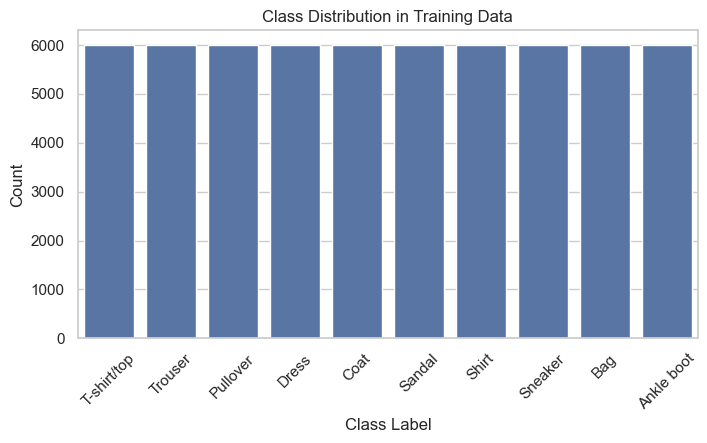

In [12]:
label_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

plt.figure(figsize=(8,4))
sns.countplot(x='label', data=train)
plt.xticks(ticks=range(10), labels=label_names, rotation=45)
plt.title("Class Distribution in Training Data")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

## Pixel Value Statistics

We examine the minimum, maximum, and mean pixel values.  
This helps us understand the range and scale of the image data, and check for any anomalies.

In [13]:
pixels = train.drop('label', axis=1)
print("Pixel values: min =", pixels.min().min(), ", max =", pixels.max().max())
print("Pixel values: mean =", pixels.values.mean())

Pixel values: min = 0 , max = 255
Pixel values: mean = 72.9568306122449


## Analyze Value Distribution (Need for Normalization)

In this step, we analyze the distribution of pixel values to determine if normalization is needed.  
Normalization can help machine learning models converge faster and perform better, especially when features have different scales.  
We will plot the distribution of pixel values before any normalization.

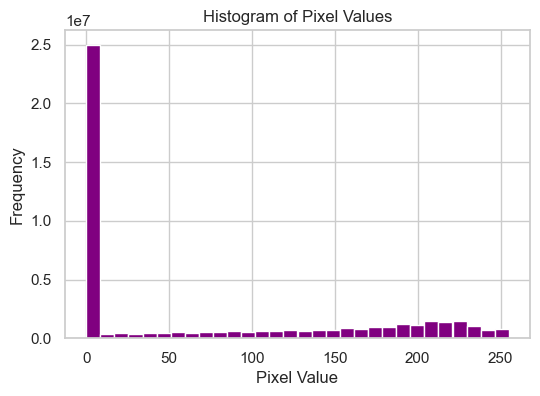

In [14]:
plt.figure(figsize=(6,4))
plt.hist(pixels.values.flatten(), bins=30, color='purple')
plt.title("Histogram of Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

## Pixel Distribution Analysis

Min = 0, Max = 255 → Standard 8-bit range (expected).

Mean ≈ 73 → Most pixels are darker than mid-gray (128 would be neutral gray).

Std ≈ 90 → High variability (some pixels are near 0, others near 255).

Key Insight:

The wide range (0-255) and uneven distribution can slow down training and make optimization harder for neural networks.

## Why Normalize?
✔ Faster training – Models converge quicker when features are on similar scales.
✔ Better gradient stability – Large values (e.g., 255) can cause unstable updates in backpropagation.
✔ Improved performance – Many models (e.g., CNNs) work best with inputs in [0, 1] or [-1, 1].
_____________________________________________________________________

## Show One Example per Class

We display one representative image for each clothing category.  
This helps us understand what each class looks like and spot any potential labeling errors.

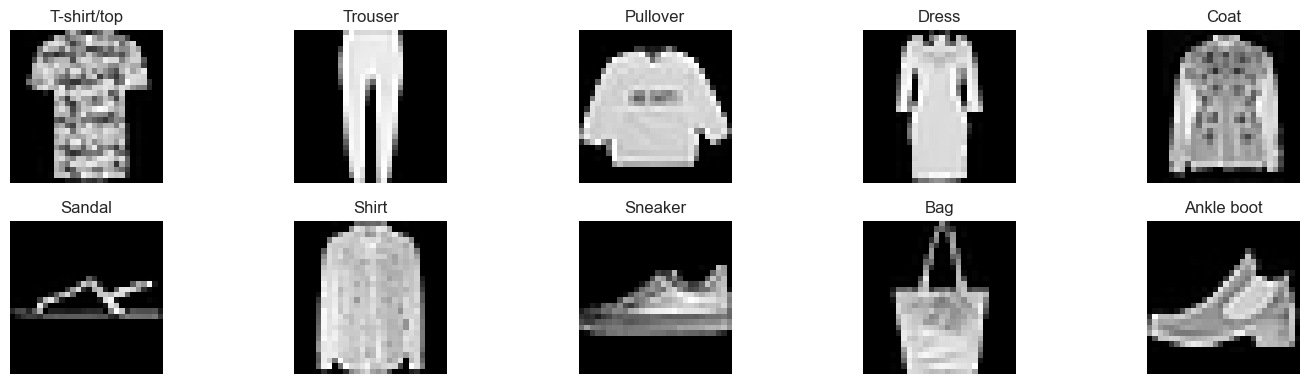

In [16]:
plt.figure(figsize=(15,4))
for label in range(10):
    idx = train[train['label'] == label].index[0]
    plt.subplot(2,5,label+1)
    plt.imshow(train.iloc[idx,1:].values.reshape(28,28), cmap='gray')
    plt.title(label_names[label])
    plt.axis('off')
plt.tight_layout()
plt.show()

![](/home/piroz/DEV/AI-kursen/fashion_mnist_project/outputs/Fashion-MNIST-Dataset-Images-with-Labels-and-Description-II-LITERATURE-REVIEW-In-image.png)


In [17]:
corr = train.corr()['label'].drop('label')
print("Top 10 absolute correlations with label:")
print(corr.abs().sort_values(ascending=False).head(10))

Top 10 absolute correlations with label:
pixel40     0.674461
pixel418    0.664797
pixel446    0.664342
pixel390    0.659438
pixel474    0.656930
pixel39     0.646898
pixel445    0.645482
pixel362    0.645247
pixel417    0.643718
pixel389    0.640325
Name: label, dtype: float64


## PCA Exploration

We will perform a preliminary Principal Component Analysis (PCA) on the Fashion-MNIST data.  
PCA helps us reduce the dimensionality of the data and can reveal if there are any natural clusters or groupings among the images.  
We will plot the first two principal components and color the points by their class labels.

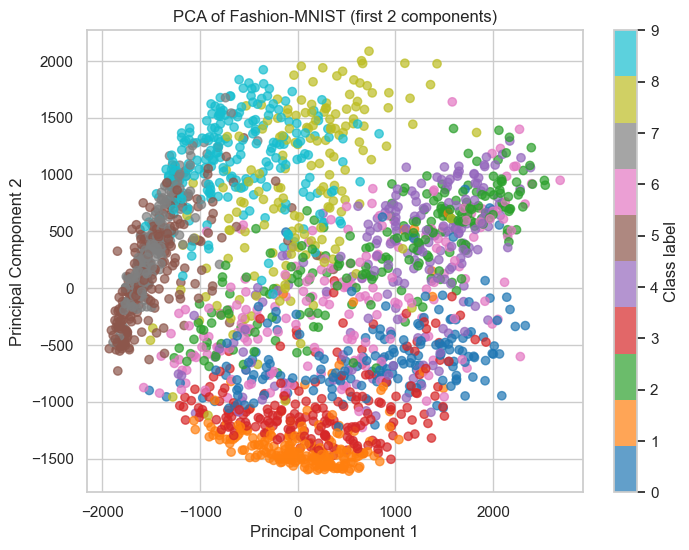

In [18]:
from sklearn.decomposition import PCA

# For speed, let's use a subset (e.g., 2000 samples)
sample_size = 2000
sample = train.sample(sample_size, random_state=42)
X_sample = sample.drop('label', axis=1).values
y_sample = sample['label'].values

# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

# Plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_sample, cmap='tab10', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fashion-MNIST (first 2 components)')
plt.colorbar(scatter, ticks=range(10), label='Class label')
plt.show()

## t-SNE Visualization

We will use t-distributed Stochastic Neighbor Embedding (t-SNE) to visualize the Fashion-MNIST data in two dimensions.  
t-SNE is a non-linear dimensionality reduction technique that is particularly good at preserving local structure and revealing clusters in high-dimensional data.  
This plot can help us see how the different classes are grouped in a low-dimensional space.

/home/piroz/DEV/AI-kursen/fashion_mnist_project/venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


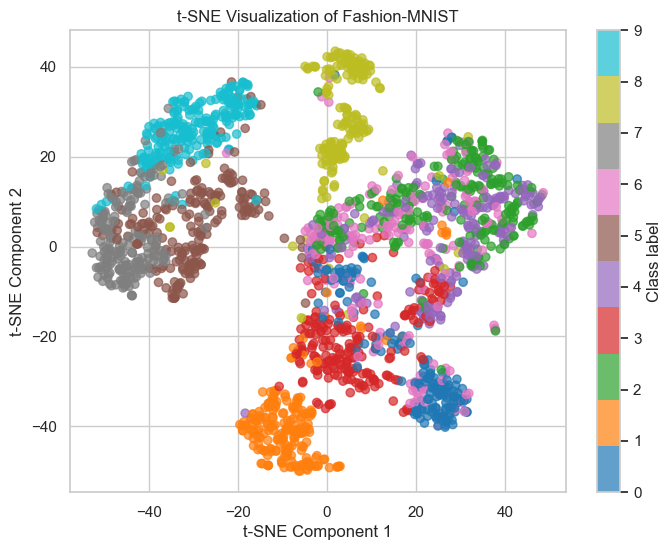

In [19]:
from sklearn.manifold import TSNE

# t-SNE can be slow, so we use the same subset as for PCA
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_sample)

# Plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_sample, cmap='tab10', alpha=0.7)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Fashion-MNIST')
plt.colorbar(scatter, ticks=range(10), label='Class label')
plt.show()

## Pixel Correlation Analysis

In this step, we investigate if there are highly correlated pixels in the dataset.  
Highly correlated pixels may indicate redundant features, which can be removed to simplify the model and reduce overfitting.  
We will compute the correlation matrix for a subset of pixels and visualize it as a heatmap.

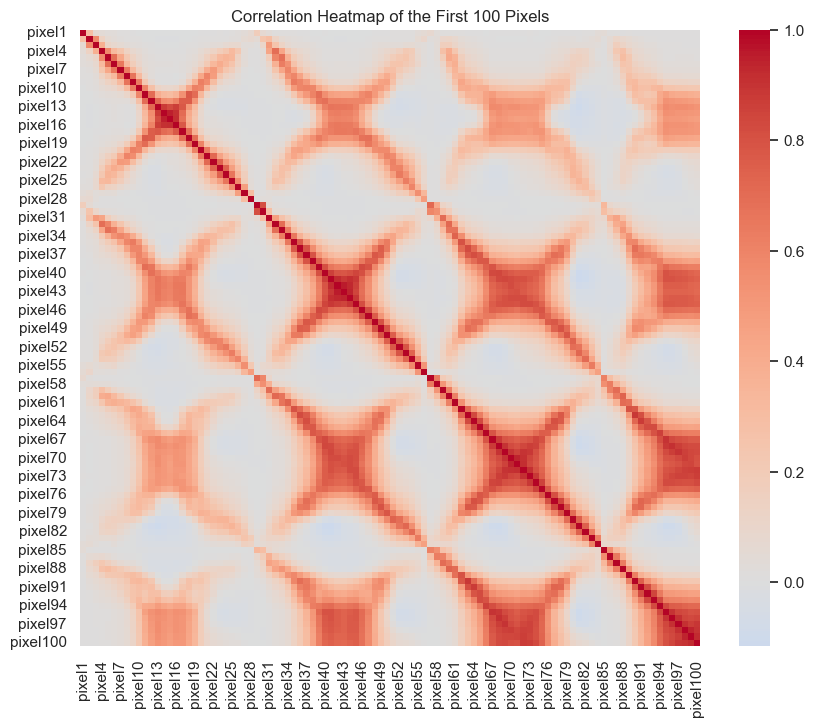

In [20]:
# For computational efficiency, let's use a subset of pixels (e.g., the first 100 pixels)
pixel_subset = pixels.iloc[:, :100]  # first 100 pixels

# Compute the correlation matrix
corr_matrix = pixel_subset.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of the First 100 Pixels')
plt.show()

## Class Separation Analysis (Fisher Score)

Here, we calculate the Fisher score for each pixel.  
The Fisher score measures how well each pixel separates the different classes.  
A high Fisher score means the pixel is useful for distinguishing between classes, while a low score means it is less informative.

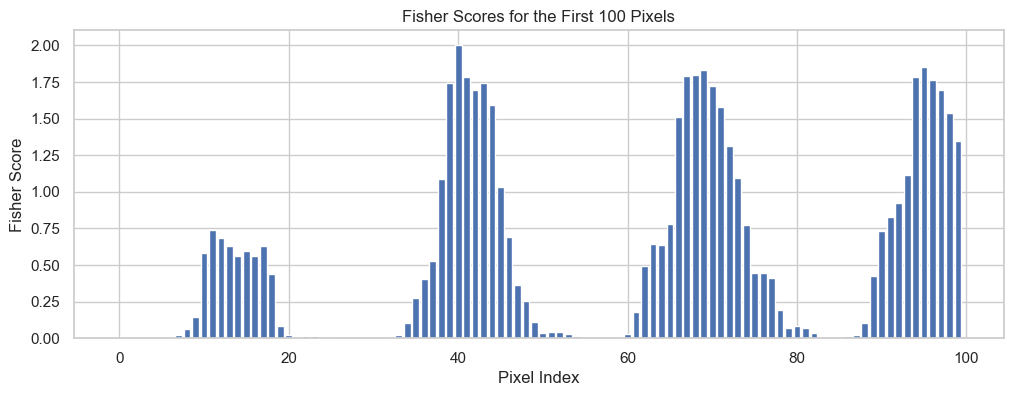

In [21]:
def fisher_score(X, y):
    """Compute Fisher score for each feature (pixel)."""
    classes = np.unique(y)
    n_classes = len(classes)
    n_features = X.shape[1]
    scores = np.zeros(n_features)
    overall_mean = np.mean(X, axis=0)
    for i in range(n_features):
        num = 0
        denom = 0
        for c in classes:
            X_c = X[y == c, i]
            n_c = X_c.shape[0]
            mean_c = np.mean(X_c)
            var_c = np.var(X_c)
            num += n_c * (mean_c - overall_mean[i])**2
            denom += n_c * var_c
        scores[i] = num / denom if denom != 0 else 0
    return scores

# Compute Fisher scores for all pixels
X = pixels.values
y = train['label'].values
fisher_scores = fisher_score(X, y)

# Plot the Fisher scores for the first 100 pixels
plt.figure(figsize=(12,4))
plt.bar(range(100), fisher_scores[:100])
plt.xlabel('Pixel Index')
plt.ylabel('Fisher Score')
plt.title('Fisher Scores for the First 100 Pixels')
plt.show()

## Summary and Analysis

**Data Overview:**  
The Fashion-MNIST dataset consists of 60,000 training and 10,000 test grayscale images, each 28x28 pixels, representing 10 different classes of clothing. The data is well-structured, with no missing values, and each row corresponds to a single image.

**Class Distribution:**  
The class distribution is balanced, with each clothing category having a similar number of samples. This is ideal for training machine learning models, as it reduces the risk of bias toward any particular class.

**Pixel Value Analysis:**  
Raw pixel values range from 0 to 255, with most values clustered toward the lower end, indicating that many pixels are close to black. The distribution suggests that normalization is beneficial to bring all features to a similar scale.

**Visualization:**  
Sample images and class examples confirm that the data is correctly labeled and visually diverse. Each class has distinct visual characteristics, although some classes (e.g., Shirt vs. T-shirt/top) may look similar.

**Dimensionality Reduction (PCA & t-SNE):**  
- **PCA:** The first two principal components capture some structure in the data, but there is significant overlap between classes, indicating that linear separation is challenging.
- **t-SNE:** The t-SNE plot reveals more distinct clusters for each class, though some overlap remains. This suggests that while the classes are not perfectly separable, there is meaningful structure in the data that models can exploit.

**Correlation Analysis:**  
The correlation heatmap of pixel values shows that many neighboring pixels are highly correlated, which is expected for image data. This redundancy suggests that dimensionality reduction or feature selection could be beneficial.

**Class Separation (Fisher Score):**  
Fisher score analysis highlights that some pixels are much more informative for class separation than others. Most pixels have low Fisher scores, indicating that only a subset of features are truly discriminative.

**Normalization:**  
Comparing raw, min-max scaled, and z-score standardized pixel values demonstrates that normalization significantly changes the distribution of features. Both min-max scaling and z-score standardization are effective, and either can be used to improve model training and convergence.

---

**Conclusion:**  
The Fashion-MNIST dataset is clean, balanced, and well-suited for machine learning tasks.  
- Normalization is recommended due to the wide range of pixel values.
- Dimensionality reduction and feature selection may help reduce redundancy and improve model performance.
- While some classes are visually similar and not perfectly separable, there is enough structure in the data for effective classification with appropriate models.

Further steps could include building and evaluating classification models, experimenting with different preprocessing techniques, and exploring advanced feature extraction methods.